## Importing Dependencies and setting up 

In [1]:
import tensorflow as tf
import os

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import PIL
import pathlib
import PIL.Image
import warnings


## Data Pre processing

In [5]:
base_dir = "plantvillage dataset"

In [6]:
n = len(os.listdir(os.path.join(base_dir,"color")))
print("No. of classes: " , n)

No. of classes:  38


In [7]:
import cv2
import imghdr

In [8]:
# Set the directory where the images are stored
image_dir = "plantvillage dataset/color"
# Set the size threshold (9 KB)
size_threshold = 9 * 1024  # Convert KB to bytes
# Specify allowed image extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Loop through each subdirectory (each class) in the base directory
for class_name in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_name)
    
    # Check if the item is a directory
    if os.path.isdir(class_dir):
        # Loop through each file in the class directory
        for filename in os.listdir(class_dir):
            # Check if the file has a valid extension
            if filename.split('.')[-1].lower() in image_exts:
                file_path = os.path.join(class_dir, filename)
                
                # Check if the item is a file (not a directory)
                if os.path.isfile(file_path):
                    # Get the file size
                    file_size = os.path.getsize(file_path)
                    
                    # If the file is smaller than the threshold, delete it
                    if file_size < size_threshold:
                        os.remove(file_path)
                        print(f"Deleted {file_path} (Size: {file_size} bytes)")

print("Deletion process complete.")


Deletion process complete.


In [9]:
# Initialize a total counter
total_images = 0

# Loop through each subdirectory (each class) in the base directory
for class_name in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_name)
    # Check if the item is a directory (each class folder)
    if os.path.isdir(class_dir):
        # Count the images in the current class
        image_count = sum(1 for filename in os.listdir(class_dir) 
                          if filename.split('.')[-1].lower() in image_exts)
        
        # Print the number of images in this class
        print(f"Class '{class_name}': {image_count} images")
        
        # Add to the total count
        total_images += image_count

# Print the total number of images across all classes
print(f"Total images across all classes: {total_images}")


Class 'Apple___Apple_scab': 578 images
Class 'Apple___Black_rot': 620 images
Class 'Apple___Cedar_apple_rust': 241 images
Class 'Apple___healthy': 1624 images
Class 'Blueberry___healthy': 1497 images
Class 'Cherry_(including_sour)___healthy': 845 images
Class 'Cherry_(including_sour)___Powdery_mildew': 841 images
Class 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 509 images
Class 'Corn_(maize)___Common_rust_': 1182 images
Class 'Corn_(maize)___healthy': 803 images
Class 'Corn_(maize)___Northern_Leaf_Blight': 979 images
Class 'Grape___Black_rot': 1180 images
Class 'Grape___Esca_(Black_Measles)': 1383 images
Class 'Grape___healthy': 422 images
Class 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076 images
Class 'Orange___Haunglongbing_(Citrus_greening)': 3405 images
Class 'Peach___Bacterial_spot': 2179 images
Class 'Peach___healthy': 359 images
Class 'Pepper,_bell___Bacterial_spot': 995 images
Class 'Pepper,_bell___healthy': 1470 images
Class 'Potato___Early_blight': 1000 image

In [10]:
import cv2
image_path = 'plantvillage dataset/color/Tomato___Tomato_mosaic_virus/feabce4c-9bb1-4fca-bcbf-368cacd40a68___PSU_CG 2115.JPG'
test_image = cv2.imread(image_path)
print(test_image)

[[[161 143 156]
  [171 153 166]
  [170 152 165]
  ...
  [212 195 208]
  [184 167 180]
  [166 149 162]]

 [[159 141 154]
  [182 164 177]
  [160 142 155]
  ...
  [161 144 157]
  [165 148 161]
  [186 169 182]]

 [[133 115 128]
  [192 174 187]
  [140 122 135]
  ...
  [136 119 132]
  [163 146 159]
  [175 158 171]]

 ...

 [[125 106 125]
  [134 115 134]
  [149 130 149]
  ...
  [112  96 114]
  [114  98 116]
  [ 77  61  79]]

 [[118  99 118]
  [145 126 145]
  [136 117 136]
  ...
  [113  97 115]
  [ 94  78  96]
  [ 98  82 100]]

 [[112  93 112]
  [142 123 142]
  [ 93  74  93]
  ...
  [139 123 141]
  [ 85  69  87]
  [118 102 120]]]


In [11]:
test_image.shape

(256, 256, 3)

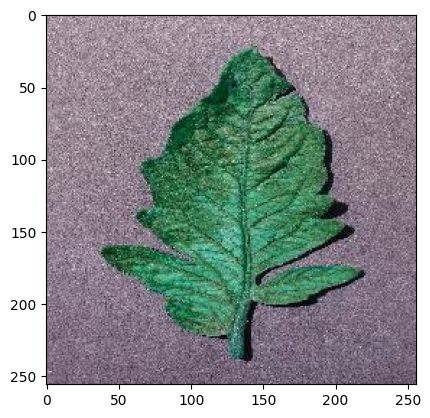

In [12]:
plt.imshow(test_image)
plt.show()

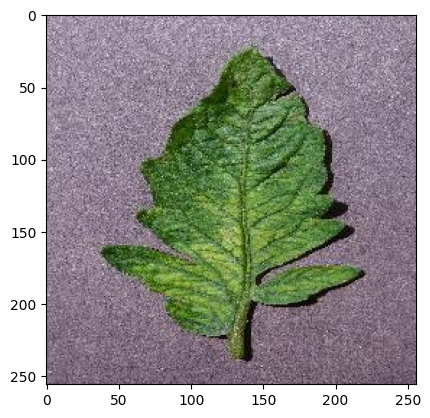

In [14]:
plt.imshow(cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB))
plt.show()

## Data Augmentation

In [15]:
from tensorflow.image import flip_left_right,adjust_brightness,adjust_contrast
imageAug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

In [55]:
img_size = 255
batch_size = 32

In [17]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

In [31]:
train_generator = data_gen.flow_from_directory(
    image_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',#train split
    class_mode='categorical'#one hot encoding
)

Found 39723 images belonging to 38 classes.


In [32]:
validation_generator = data_gen.flow_from_directory(
    image_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',#test split
    class_mode='categorical'#one hot encoding
)

Found 9912 images belonging to 38 classes.


## Building Model

In [50]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])


# Define the residual block for ResNet50
def residual_block(input_tensor, filters, strides=1):
   
    # Unpack the number of filters
    filter1, filter2, filter3 = filters

    # First convolution layer (1x1)
    x = Conv2D(filter1, (1, 1), strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second convolution layer (3x3)
    x = Conv2D(filter2, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Third convolution layer (1x1)
    x = Conv2D(filter3, (1, 1), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut path for downsampling
    shortcut = input_tensor
    if strides != 1 or input_tensor.shape[-1] != filter3:
        shortcut = Conv2D(filter3, (1, 1), strides=strides, padding='same')(input_tensor)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut and main path
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Define the ResNet50 model
def ResNet50(input_shape=(224, 224, 3), num_classes=38):
    inputs = Input(shape=input_shape)

    # Initial convolution and max-pooling
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Stage 1
    x = residual_block(x, filters=[64, 64, 256], strides=1)
    x = residual_block(x, filters=[64, 64, 256], strides=1)
    x = residual_block(x, filters=[64, 64, 256], strides=1)

    # Stage 2
    x = residual_block(x, filters=[128, 128, 512], strides=2)
    x = residual_block(x, filters=[128, 128, 512], strides=1)
    x = residual_block(x, filters=[128, 128, 512], strides=1)
    x = residual_block(x, filters=[128, 128, 512], strides=1)

    # Stage 3
    x = residual_block(x, filters=[256, 256, 1024], strides=2)
    x = residual_block(x, filters=[256, 256, 1024], strides=1)
    x = residual_block(x, filters=[256, 256, 1024], strides=1)
    x = residual_block(x, filters=[256, 256, 1024], strides=1)
    x = residual_block(x, filters=[256, 256, 1024], strides=1)
    x = residual_block(x, filters=[256, 256, 1024], strides=1)

    # Stage 4
    x = residual_block(x, filters=[512, 512, 2048], strides=2)
    x = residual_block(x, filters=[512, 512, 2048], strides=1)
    x = residual_block(x, filters=[512, 512, 2048], strides=1)

    # Global Average Pooling and Output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

   
    model = Model(inputs, outputs)
    return model




In [56]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

model = ResNet50(input_shape=(224, 224, 3), num_classes=38)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',Precision(), Recall()])


model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_395 (Conv2D)            (None, 112, 112, 64  9472        ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_395 (Batch  (None, 112, 112, 64  256        ['conv2d_395[0][0]']             
 Normalization)                 )                                                           

## Model Training

In [54]:
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model/checkpoint_{epoch:02d}.hdf5',  # Saves the model after each epoch
        save_best_only=True,                           # Only saves if it's the best seen so far
        monitor='val_loss',                            # Monitors validation loss
        mode='min'                                     # Looks for minimum validation loss
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,                                    # Stops training after 5 epochs of no improvement
        mode='min'
    )
]


In [57]:
from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    x=train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,
    callbacks=callbacks_list
)



Epoch 1/20
1241/1241 [==============================] - 157s 117ms/step - loss: 2.0279 - accuracy: 0.4665 - precision_7: 0.6935 - recall_7: 0.3203 - val_loss: 2.4968 - val_accuracy: 0.3954 - val_precision_7: 0.5592 - val_recall_7: 0.3190
Epoch 2/20
1241/1241 [==============================] - 133s 107ms/step - loss: 0.9355 - accuracy: 0.7160 - precision_7: 0.8097 - recall_7: 0.6363 - val_loss: 3.2046 - val_accuracy: 0.4646 - val_precision_7: 0.5252 - val_recall_7: 0.4108
Epoch 3/20
1241/1241 [==============================] - 133s 107ms/step - loss: 0.7031 - accuracy: 0.7810 - precision_7: 0.8464 - recall_7: 0.7287 - val_loss: 13.6386 - val_accuracy: 0.2150 - val_precision_7: 0.2150 - val_recall_7: 0.1926
Epoch 4/20
1241/1241 [==============================] - 173s 139ms/step - loss: 0.5778 - accuracy: 0.8188 - precision_7: 0.8643 - recall_7: 0.7788 - val_loss: 1.1555 - val_accuracy: 0.6934 - val_precision_7: 0.7511 - val_recall_7: 0.6610
Epoch 5/20
1241/1241 [=========================

In [58]:
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(
    validation_generator,
    steps=validation_generator.samples // batch_size
)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Precision: {val_precision * 100:.2f}%")
print(f"Validation Recall: {val_recall * 100:.2f}%")


309/309 [==============================] - 14s 43ms/step - loss: 0.2334 - accuracy: 0.9343 - precision_7: 0.9410 - recall_7: 0.9294
Validation Loss: 0.2334
Validation Accuracy: 93.43%
Validation Precision: 94.10%
Validation Recall: 92.94%


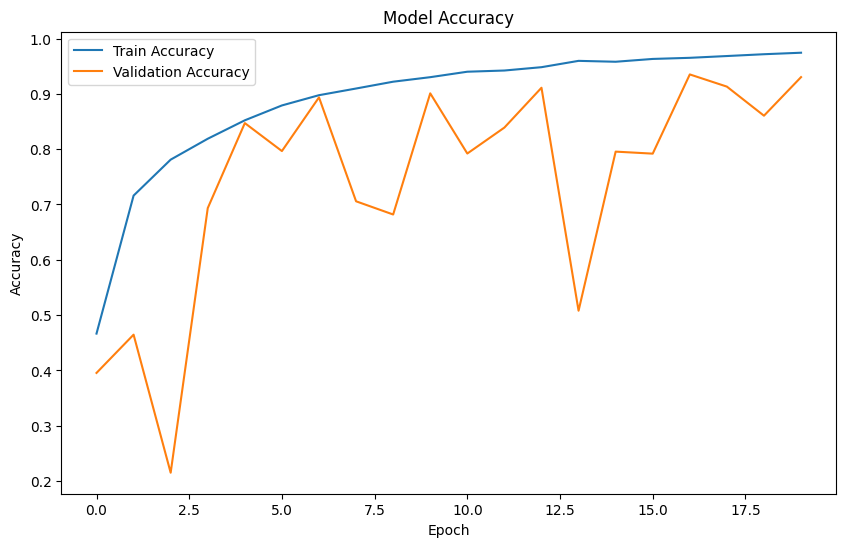

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()



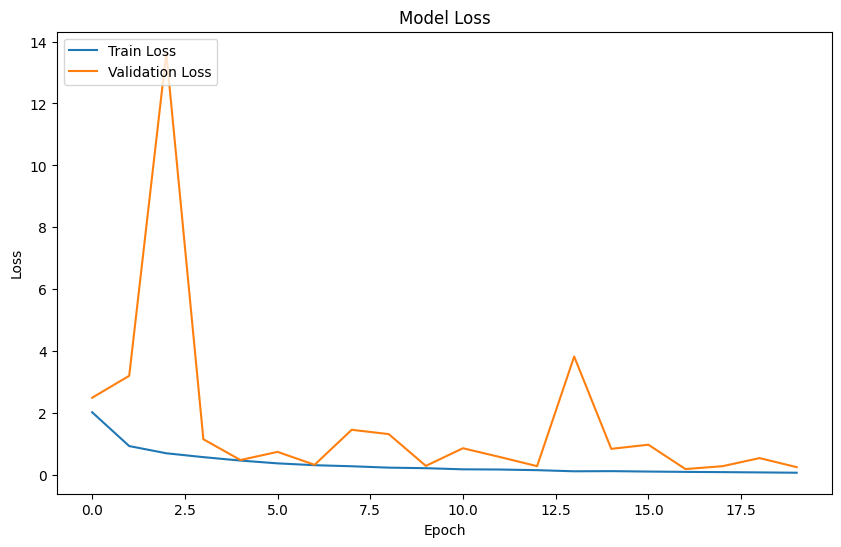

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [66]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'precision_7', 'recall_7', 'val_loss', 'val_accuracy', 'val_precision_7', 'val_recall_7'])


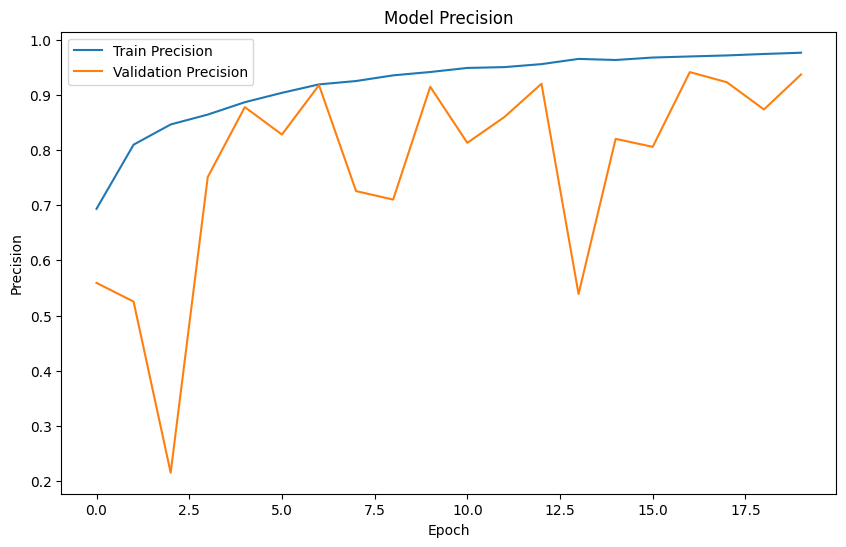

In [67]:
# Plot training & validation precision values
plt.figure(figsize=(10, 6))
plt.plot(history.history['precision_7'], label='Train Precision')
plt.plot(history.history['val_precision_7'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(loc='upper left')
plt.show()

In [68]:
model.save('plant_disease_classifier_resnet50.h5')

In [69]:
model.save('plant_disease_classifier_resnet50.keras')